In [14]:
# import os
# os.chdir('/home/reggie/cosmo_learn')

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from cosmo_learn.cosmo_learn import *

### One mock

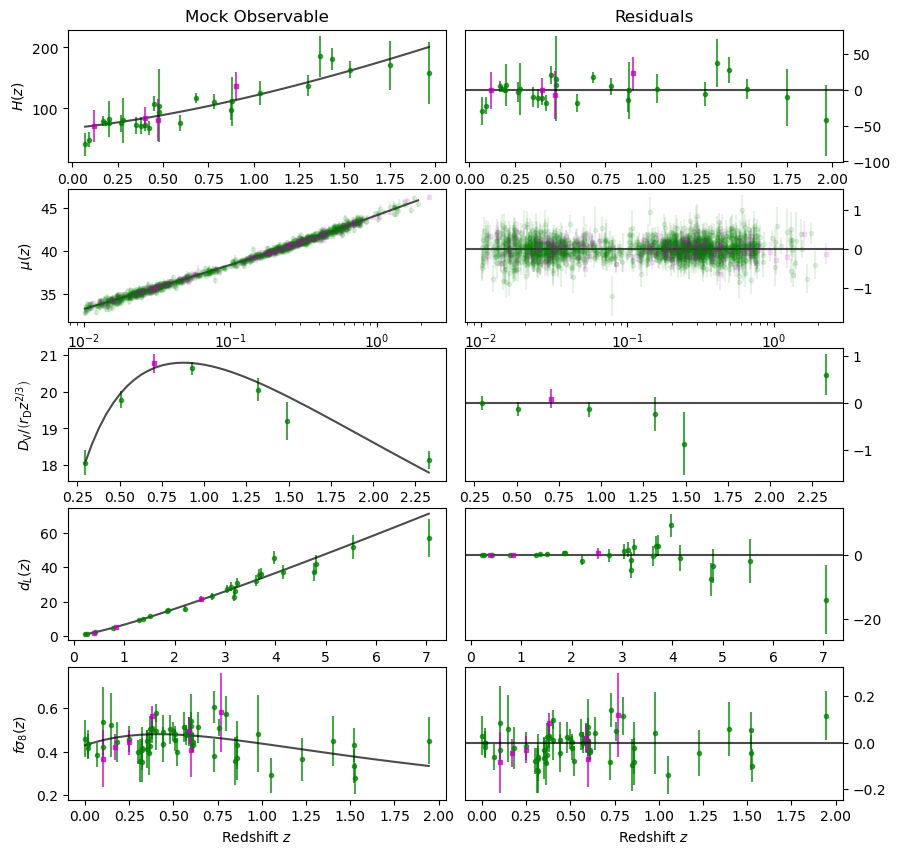

In [2]:
# s8=0.834+/-0.016 (Planck); s8=0.745+/-0.039 (KiDS-450); see https://arxiv.org/abs/2008.11285
# H0, Om0, w0, s8 = 70, 0.3, -1, 0.8

# desi1 Flat wCDM https://arxiv.org/pdf/2404.03002 + planck s8
H0, Om0, w0, s8 = 67.74, 0.3095, -0.997, 0.834

my_cosmo_learn=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
           'BrightSirens', 'RedshiftSpaceDistorsions']
my_cosmo_learn.make_mock(mock_keys=mock_keys)

# fig, ax=my_cosmo_learn.show_mocks(show_input=True) # only mocks, no residuals
fig, ax=my_cosmo_learn.show_mocks_and_residuals(show_input=True, label_train=None, label_test=None)
fig.subplots_adjust(wspace=0.05)
plt.show()

### Multiple mocks, fixed random seed

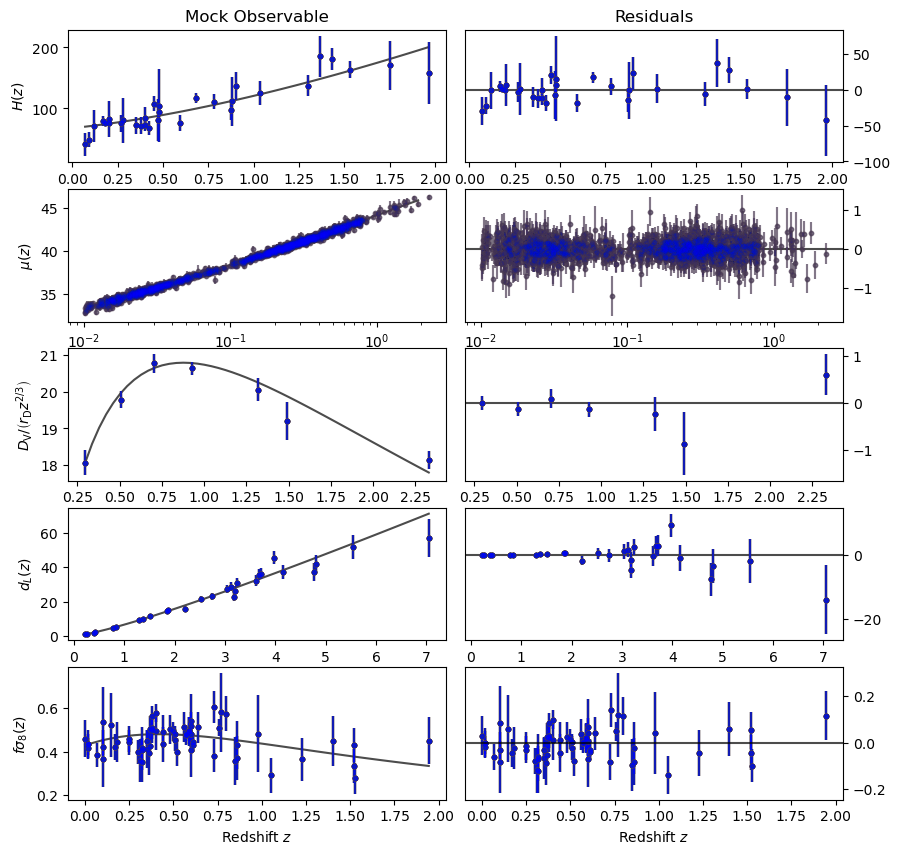

In [3]:
# s8=0.834+/-0.016 (Planck); s8=0.745+/-0.039 (KiDS-450); see https://arxiv.org/abs/2008.11285
# H0, Om0, w0, s8 = 70, 0.3, -1, 0.8

# desi1 Flat wCDM https://arxiv.org/pdf/2404.03002 + planck s8
H0, Om0, w0, s8 = 67.74, 0.3095, -0.997, 0.834

my_cosmo_learn=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
           'BrightSirens', 'RedshiftSpaceDistorsions']
my_cosmo_learn.make_mock(mock_keys=mock_keys)

# fig, ax=my_cosmo_learn.show_mocks(show_input=True) # only mocks, no residuals
fig, ax=my_cosmo_learn.show_mocks_and_residuals(show_input=True, fmt_train='go', fmt_test='go')
fig.subplots_adjust(wspace=0.05)

# loop with fixed random seed
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for rs in range(10):
    my_cosmo_learn_rs=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
    my_cosmo_learn_rs.make_mock(mock_keys=mock_keys)
    color = colors[rs % len(colors)]
    my_cosmo_learn_rs.show_mocks_and_residuals(ax=ax, fmt_train=f'{color}o', fmt_test=f'{color}o')
plt.show()

### Multiple mocks, changing random seed

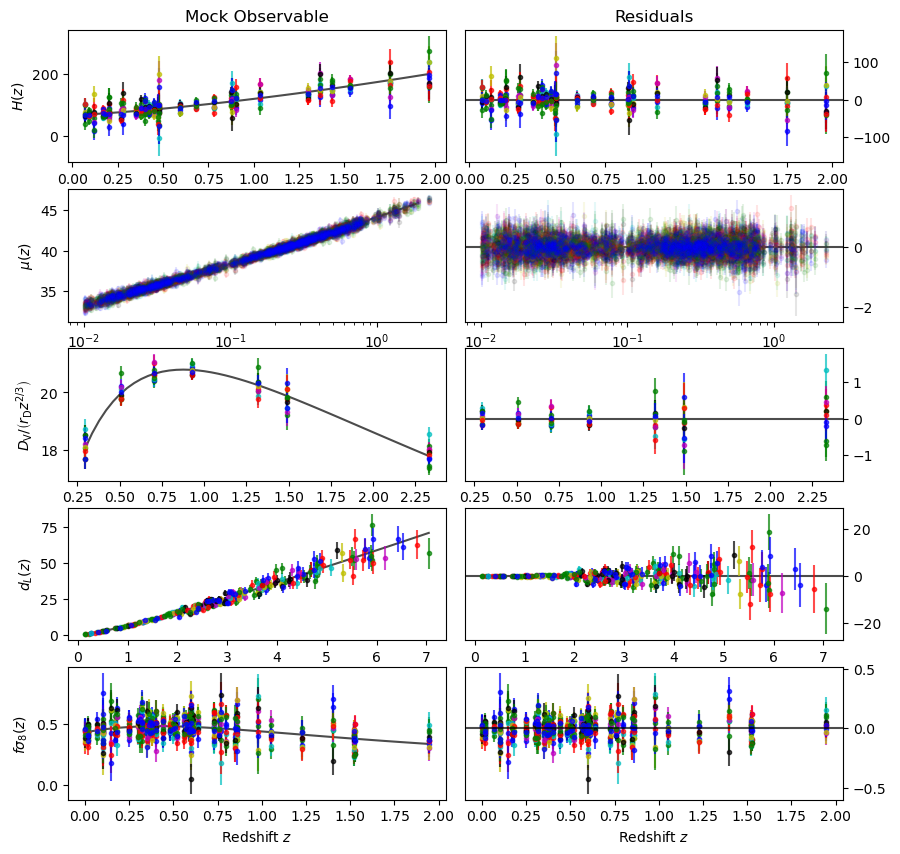

In [4]:
# s8=0.834+/-0.016 (Planck); s8=0.745+/-0.039 (KiDS-450); see https://arxiv.org/abs/2008.11285
# H0, Om0, w0, s8 = 70, 0.3, -1, 0.8

# desi1 Flat wCDM https://arxiv.org/pdf/2404.03002 + planck s8
H0, Om0, w0, s8 = 67.74, 0.3095, -0.997, 0.834

my_cosmo_learn=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
           'BrightSirens', 'RedshiftSpaceDistorsions']
my_cosmo_learn.make_mock(mock_keys=mock_keys)

# fig, ax=my_cosmo_learn.show_mocks(show_input=True) # only mocks, no residuals
fig, ax=my_cosmo_learn.show_mocks_and_residuals(show_input=True, fmt_train='go', fmt_test='go')
fig.subplots_adjust(wspace=0.05)

# loop with changing seed
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for rs in range(10):
    my_cosmo_learn_rs=CosmoLearn([H0, Om0, w0, s8], seed=rs)
    my_cosmo_learn_rs.make_mock(mock_keys=mock_keys)
    color = colors[rs % len(colors)]
    my_cosmo_learn_rs.show_mocks_and_residuals(ax=ax, fmt_train=f'{color}o', fmt_test=f'{color}o')
plt.show()

### GP/BRR Reconstruction

In [5]:
# s8=0.834+/-0.016 (Planck); s8=0.745+/-0.039 (KiDS-450); see https://arxiv.org/abs/2008.11285
# H0, Om0, w0, s8 = 70, 0.3, -1, 0.8

# desi1 Flat wCDM https://arxiv.org/pdf/2404.03002 + planck s8
H0, Om0, w0, s8 = 67.74, 0.3095, -0.997, 0.834

my_cosmo_learn=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
# mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
#            'BrightSirens', 'RedshiftSpaceDistorsions']
mock_keys=['CosmicChronometers', 'SuperNovae', \
           'BrightSirens', 'RedshiftSpaceDistorsions']

my_cosmo_learn.make_mock(mock_keys=mock_keys)
my_cosmo_learn.train_gp()
my_cosmo_learn.train_brr()

/home/rbernardo/miniconda3/envs/cosmo_learn_x/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge after 36 iteration(s) (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/rbernardo/miniconda3/envs/cosmo_learn_x/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/rbernardo/miniconda3/envs/cosmo_learn_x/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling f

/home/rbernardo/miniconda3/envs/cosmo_learn_x/lib/python3.10/site-packages/sklearn/linear_model/_bayes.py:403: RuntimeWarning: invalid value encountered in sqrt
  y_std = np.sqrt(sigmas_squared_data + (1.0 / self.alpha_))
/home/rbernardo/miniconda3/envs/cosmo_learn_x/lib/python3.10/site-packages/sklearn/linear_model/_bayes.py:403: RuntimeWarning: invalid value encountered in sqrt
  y_std = np.sqrt(sigmas_squared_data + (1.0 / self.alpha_))
/home/rbernardo/miniconda3/envs/cosmo_learn_x/lib/python3.10/site-packages/sklearn/linear_model/_bayes.py:403: RuntimeWarning: invalid value encountered in sqrt
  y_std = np.sqrt(sigmas_squared_data + (1.0 / self.alpha_))
/home/rbernardo/miniconda3/envs/cosmo_learn_x/lib/python3.10/site-packages/sklearn/linear_model/_bayes.py:403: RuntimeWarning: invalid value encountered in sqrt
  y_std = np.sqrt(sigmas_squared_data + (1.0 / self.alpha_))


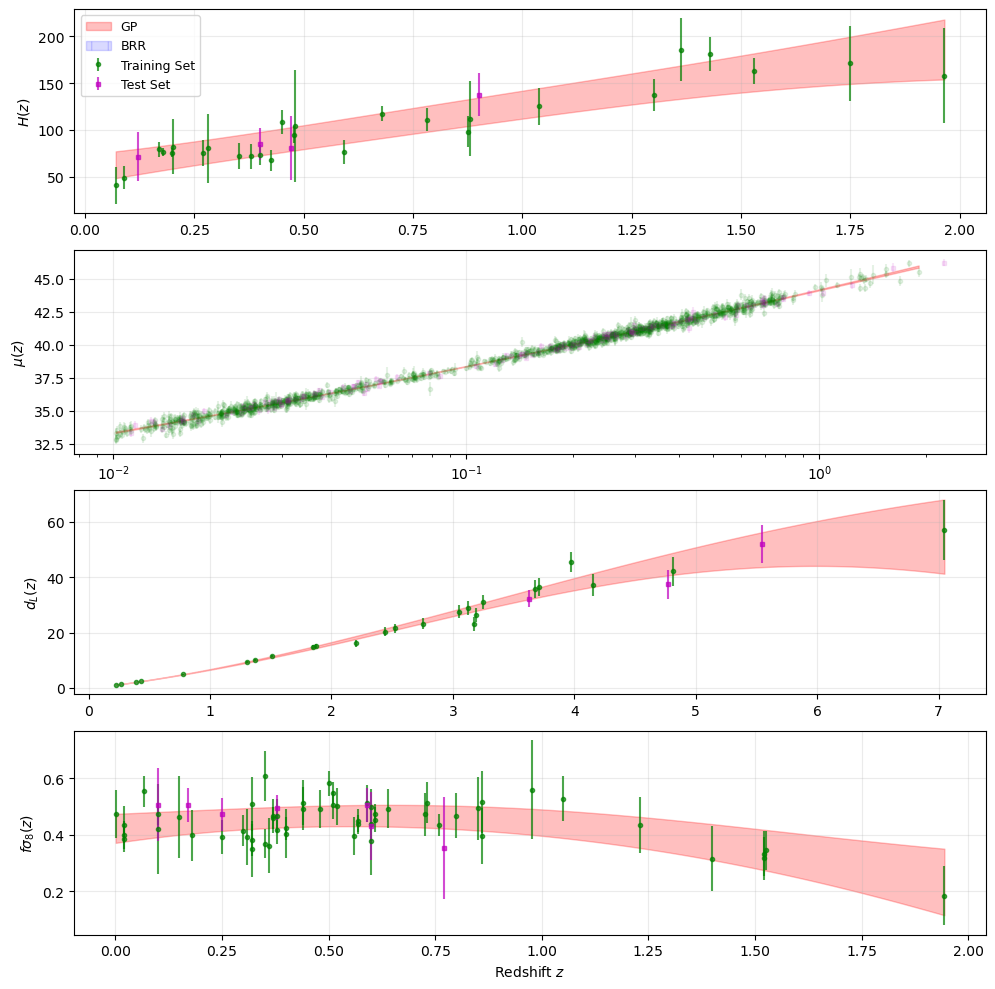

In [6]:
fig, ax=my_cosmo_learn.show_mocks(show_input=False)
my_cosmo_learn.show_trained_ml(ax=ax, method='GP', label='GP')
my_cosmo_learn.show_trained_ml(ax=ax, method='BRR', color='blue', alpha=0.15, hatch='|', label='BRR')

[ax[i].grid(True, alpha=0.25) for i in range(len(my_cosmo_learn.mock_data.keys()))]
ax[0].legend(loc='upper left', prop={'size': 9})
fig.tight_layout(); fig.subplots_adjust(hspace=0.18)
plt.show()

### ANN

In [39]:
# s8=0.834+/-0.016 (Planck); s8=0.745+/-0.039 (KiDS-450); see https://arxiv.org/abs/2008.11285
# H0, Om0, w0, s8 = 70, 0.3, -1, 0.8

# desi1 Flat wCDM https://arxiv.org/pdf/2404.03002 + planck s8
H0, Om0, w0, s8 = 67.74, 0.3095, -0.997, 0.834

my_cosmo_learn=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
# mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
#            'BrightSirens', 'RedshiftSpaceDistorsions']
mock_keys=['CosmicChronometers', 'RedshiftSpaceDistorsions', 'BrightSirens', 'BaryonAcousticOscillations']

my_cosmo_learn.make_mock(mock_keys=mock_keys)

In [ ]:
# train_data=my_cosmo_learn.mock_data['CosmicChronometers']['train']
# refann_data=np.column_stack((train_data['x'], train_data['y'], train_data['yerr']))

In [40]:
print_info = False
mid_node = 4096
hidden_layer = 1
hp_model = 'rec_1'
ann_arch={}
for key in my_cosmo_learn.mock_data.keys():
    train_data=my_cosmo_learn.mock_data[key]['train']
    if key != 'SuperNovae': 
        data=np.column_stack((train_data['x'], train_data['y'], train_data['yerr']))
    if key == 'SuperNovae':
        data=np.column_stack((np.log10(train_data['x']), train_data['y'], train_data['yerr']))
        
    ann = rf.ANN(data, mid_node=mid_node, hidden_layer=hidden_layer, hp_model=hp_model)
    ann.print_info = print_info
    ann_arch[key]=ann

# def train_ann(self, use_early_stop=True, epochs=10000, validation_split=0.1, verbose=0, patience=1000):
# use_early_stop=True, epochs=10000, validation_split=0.1, verbose=0, patience=1000



In [41]:
ANN_dict={}
for key in my_cosmo_learn.mock_data.keys():
    print(f'ANN training w/ {key} data')
    ann_cosmo=ann_arch[key]
    ann_cosmo.train()   
    ANN_dict[key]={'ANN': ann_cosmo, 'loss': ann_cosmo.loss, 'n_epochs': ann_cosmo.iteration}
# self.ANN_dict=ANN_dict

ANN training w/ CosmicChronometers data
ANN training w/ RedshiftSpaceDistorsions data
ANN training w/ BrightSirens data
ANN training w/ BaryonAcousticOscillations data


/tmp/ipykernel_625607/3323972001.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i].set_xlim(1, n_epochs); ax[i].legend(loc='lower left', prop={'size': 10})


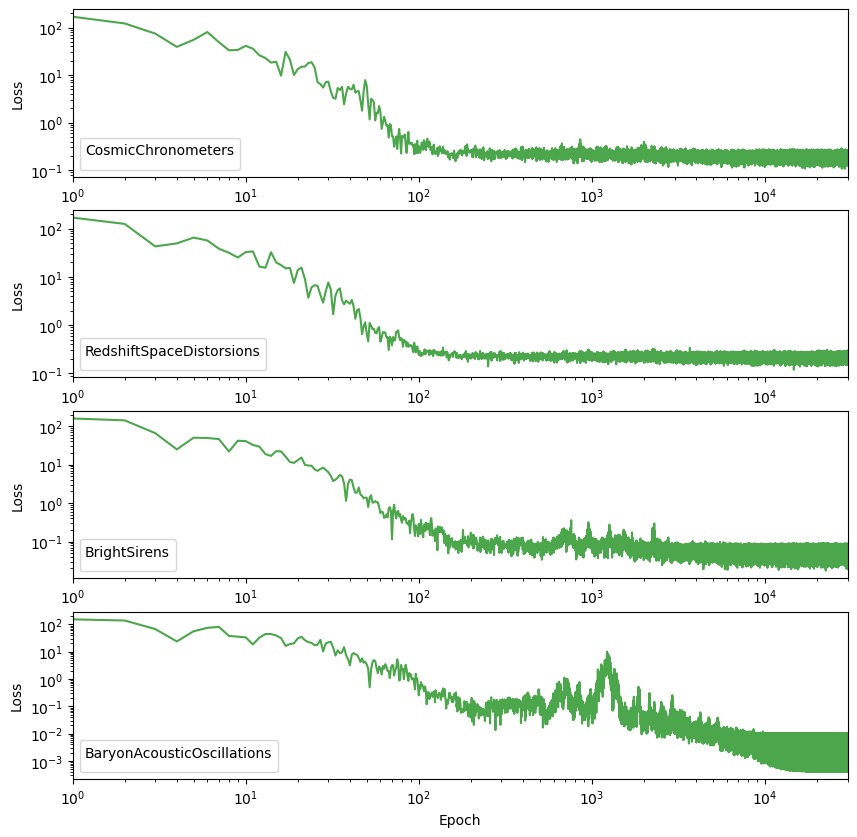

In [43]:
fig = None  # initialize fig to None
ax = None  # initialize ax to None
if ax is None:
    fig, ax = plt.subplots(nrows=len(my_cosmo_learn.mock_data.keys()), figsize=(10,10))

for i, key in enumerate(my_cosmo_learn.mock_data.keys()):
    n_epochs=len(ANN_dict[key]['loss'])
    # ax[i].plot(my_cosmo_learn.ANN_dict[key]['loss'], 'g-', alpha=0.7, label=f'Training')
    # ax[i].plot(my_cosmo_learn.ANN_dict[key]['val_loss'], '--', color='purple', alpha=0.7, label='Validation')
    ax[i].plot(range(ANN_dict[key]['n_epochs']), ANN_dict[key]['loss'], 'g-', alpha=0.7)
    ax[i].set_yscale('log'); ax[i].set_xscale('log'); ax[i].set_ylabel(f'Loss')
    ax[i].set_xlim(1, n_epochs); ax[i].legend(loc='lower left', prop={'size': 10})
    ax[i].get_legend().set_title(f'{key}')

ax[-1].set_xlabel(r'Epoch')
plt.show()

# # return fig and ax only if a new figure was created (i.e., if ax was None)
# if fig is not None:
#     return fig, ax
# else:
#     return None  # no return when ax is passed  


ANN training w/ CosmicChronometers data


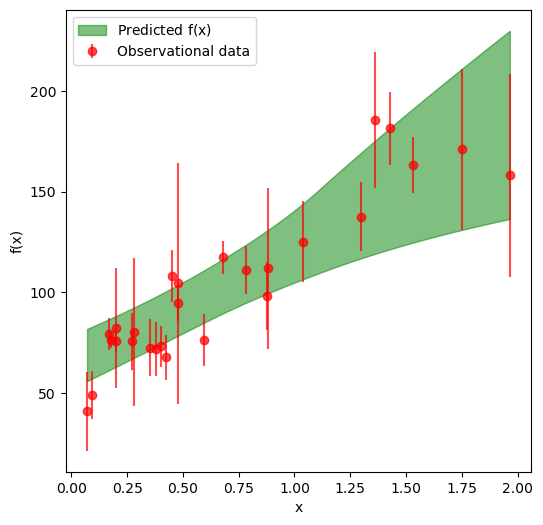

ANN training w/ RedshiftSpaceDistorsions data


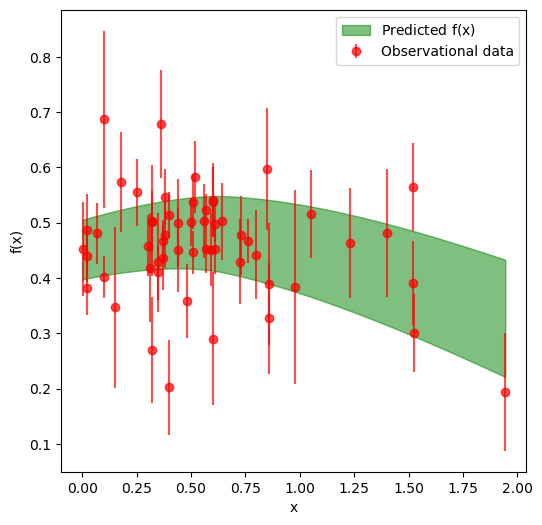

ANN training w/ BrightSirens data


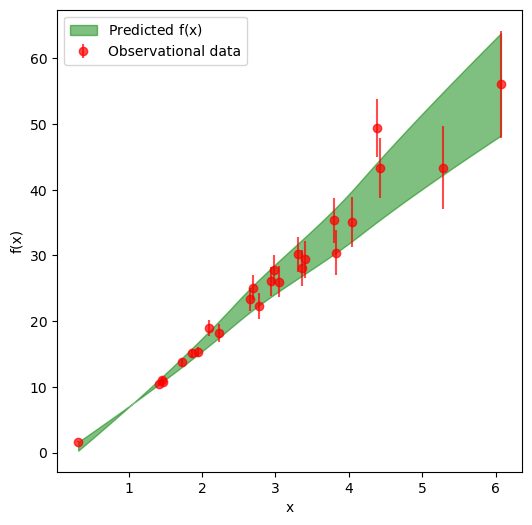

ANN training w/ BaryonAcousticOscillations data


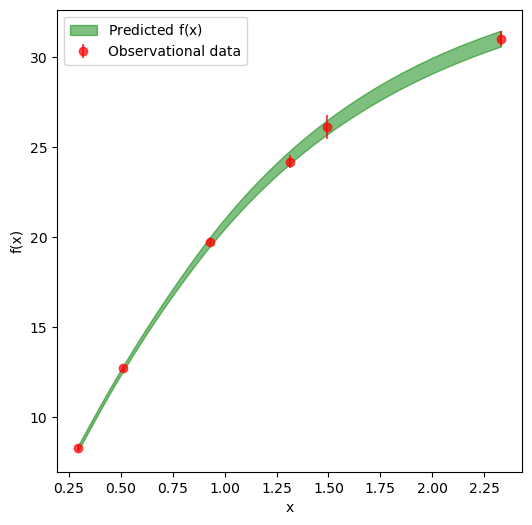

In [45]:
for key in my_cosmo_learn.mock_data.keys():
    print(f'ANN training w/ {key} data')
    train_data=my_cosmo_learn.mock_data[key]['train']
    if key != 'SuperNovae': 
        data=np.column_stack((train_data['x'], train_data['y'], train_data['yerr']))
    if key == 'SuperNovae':
        data=np.column_stack((np.log10(train_data['x']), train_data['y'], train_data['yerr']))
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.errorbar(data[:,0], data[:,1], yerr=data[:,2], fmt='ro', alpha=0.7, label='Observational data')

    ann_cosmo=ANN_dict[key]['ANN']
    rec = ann_cosmo.predict(xpoint=np.linspace(min(train_data['x']), max(train_data['x']), 100))
    z, y, yerr = rec[:,0], rec[:,1], rec[:,2]

    ax.fill_between(z, y-yerr, y+yerr, label=r'$\rm Predicted\ f(x)$', color='g', alpha=0.5)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.legend()
    plt.show()

In [ ]:
ann_arch={}
for key in my_cosmo_learn.mock_data.keys():
    if key == 'CosmicChronometers' or key =='RedshiftSpaceDistorsions' \
        or key == 'BaryonAcousticOscillations':
        ann = rf.ANN(data, mid_node=4096, hidden_layer=1, hp_model='rec_1')
        # ann=tf.keras.Sequential([Dense(32, activation='relu', input_shape=[1], \
        #                                 kernel_regularizer=tf.keras.regularizers.l2()), \
        #                             Dropout(0.1), \
        #                             Dense(64, activation='relu', \
        #                                 kernel_regularizer=tf.keras.regularizers.l2()), \
        #                             Dropout(0.1), Dense(2),])
        # ann.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())
        ann_arch[key]=ann
    if key == 'BrightSirens':
        # ann=tf.keras.Sequential([Dense(128, activation='relu', input_shape=[1], \
        #                                 kernel_regularizer=tf.keras.regularizers.l2()), \
        #                             Dropout(0.1), \
        #                             Dense(128, activation='relu', \
        #                                 kernel_regularizer=tf.keras.regularizers.l2()), \
        #                             Dropout(0.1), Dense(2),])
        # ann.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())
        ann_arch[key]=ann
    if key == 'SuperNovae':
        # ann=tf.keras.Sequential([Dense(256, activation='relu', input_shape=[1], \
        #                                 kernel_regularizer=tf.keras.regularizers.l2()), \
        #                             Dropout(0.1), \
        #                             Dense(512, activation='relu', \
        #                                 kernel_regularizer=tf.keras.regularizers.l2()), \
        #                             Dropout(0.1), Dense(2),])
        # ann.compile(optimizer=Adam(learning_rate=0.00015), loss=tf.keras.losses.MeanSquaredError())
        ann_arch[key]=ann


# def train_ann(self, use_early_stop=True, epochs=10000, validation_split=0.1, verbose=0, patience=1000):
# use_early_stop=True, epochs=10000, validation_split=0.1, verbose=0, patience=1000



/home/kinwangngpc/miniforge3/envs/cosmo_learn/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ANN training w/ CosmicChronometers data
ANN training w/ SuperNovae data
ANN training w/ BrightSirens data
ANN training w/ RedshiftSpaceDistorsions data


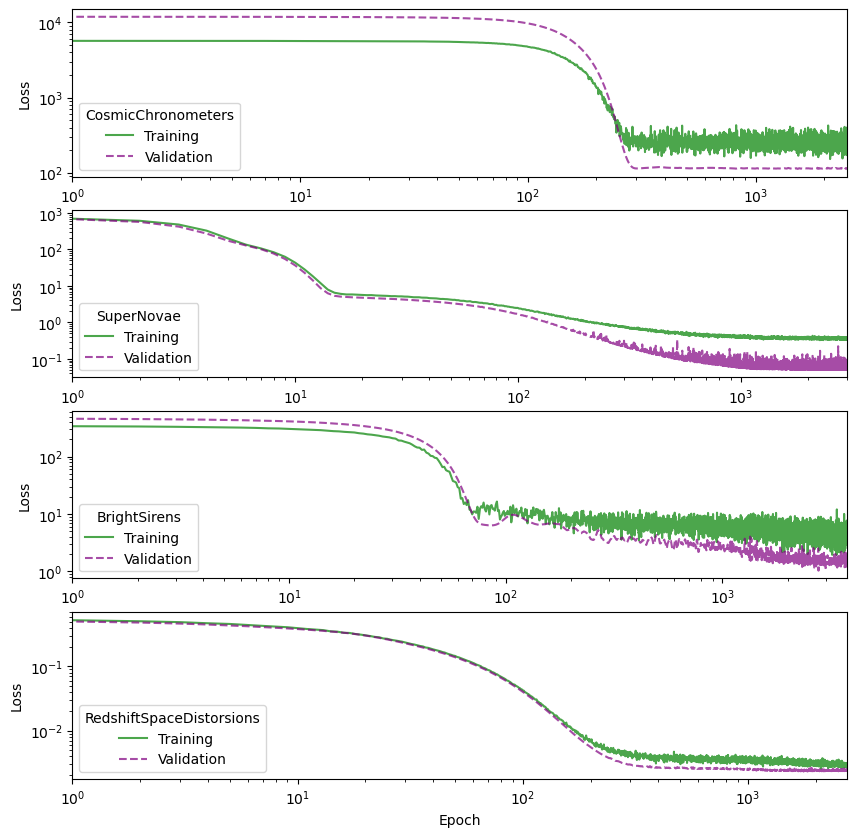

In [7]:
# s8=0.834+/-0.016 (Planck); s8=0.745+/-0.039 (KiDS-450); see https://arxiv.org/abs/2008.11285
# H0, Om0, w0, s8 = 70, 0.3, -1, 0.8

# desi1 Flat wCDM https://arxiv.org/pdf/2404.03002 + planck s8
H0, Om0, w0, s8 = 67.74, 0.3095, -0.997, 0.834

my_cosmo_learn=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
# mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
#            'BrightSirens', 'RedshiftSpaceDistorsions']
mock_keys=['CosmicChronometers', 'SuperNovae', \
           'BrightSirens', 'RedshiftSpaceDistorsions']

my_cosmo_learn.make_mock(mock_keys=mock_keys)
my_cosmo_learn.init_ann()
my_cosmo_learn.train_ann(verbose=0)
my_cosmo_learn.show_ann_loss()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7fb4463d4820> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


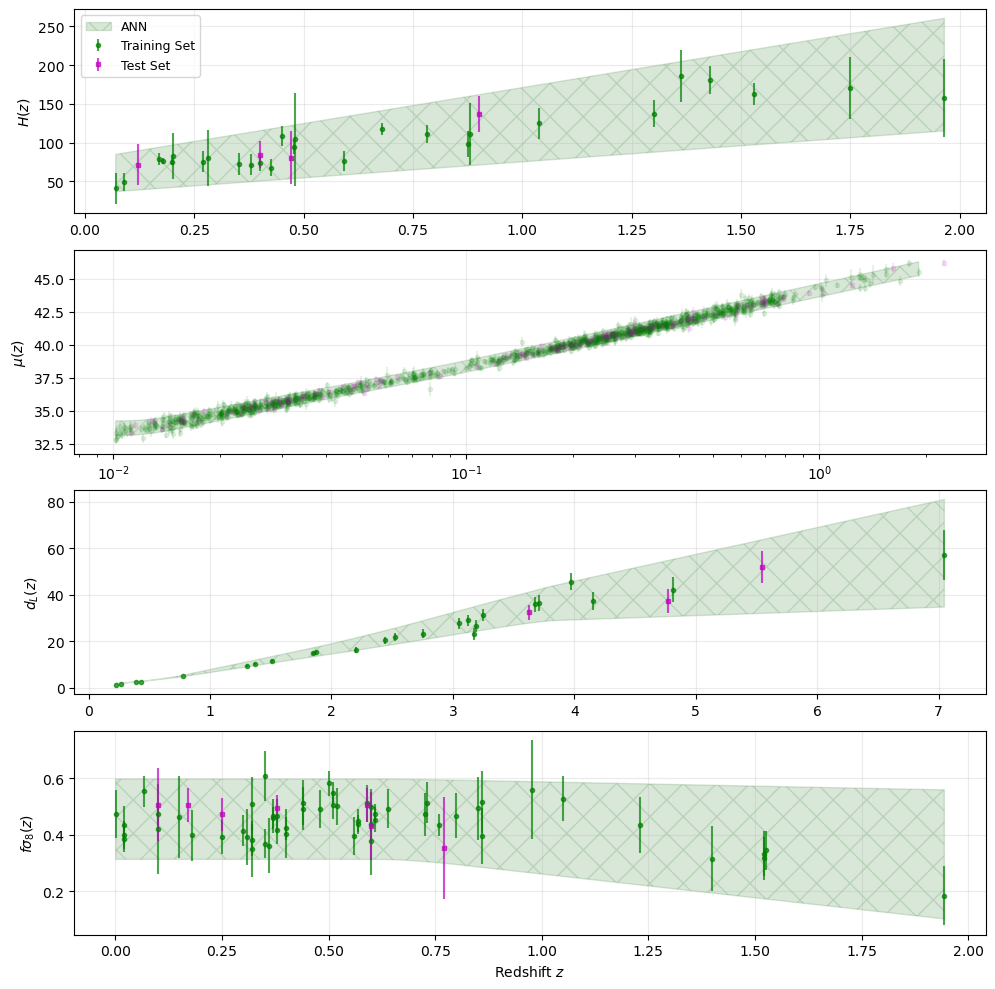

In [8]:
fig, ax=my_cosmo_learn.show_mocks(show_input=False)
my_cosmo_learn.show_trained_ml(ax=ax, method='ANN', color='darkgreen', alpha=0.15, hatch='x', label='ANN')

[ax[i].grid(True, alpha=0.25) for i in range(len(my_cosmo_learn.mock_data.keys()))]
ax[0].legend(loc='upper left', prop={'size': 9})
fig.tight_layout(); fig.subplots_adjust(hspace=0.18)
plt.show()

### MCMC and GA-Fisher

In [9]:
# s8=0.834+/-0.016 (Planck); s8=0.745+/-0.039 (KiDS-450); see https://arxiv.org/abs/2008.11285
# H0, Om0, w0, s8 = 70, 0.3, -1, 0.8

# desi1 Flat wCDM https://arxiv.org/pdf/2404.03002 + planck s8
H0, Om0, w0, s8 = 67.74, 0.3095, -0.997, 0.834

my_cosmo_learn=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
           'BrightSirens', 'RedshiftSpaceDistorsions']
# mock_keys=['CosmicChronometers', 'SuperNovae', \
#            'BrightSirens', 'RedshiftSpaceDistorsions']
my_cosmo_learn.make_mock(mock_keys=mock_keys)

In [10]:
prior_dict={'H0_min': 0, 'H0_max': 100, 'Om0_min': 0, 'Om0_max': 1, \
            'w0_min': -10, 'w0_max': 10, 's8_min': 0.2, 's8_max': 1.5}
rd_fid_prior={'mu': 147.46, 'sigma': 0.28}
llprob=lambda x: my_cosmo_learn.llprob_wcdm(x, prior_dict=prior_dict, rd_fid_prior=rd_fid_prior)

p0=[70, 0.3, -1, 0.8, 147]
nwalkers=15; dres=[0.05, 0.005, 0.01, 0.01, 0.005]; nburn=100; nmcmc=2000
my_cosmo_learn.get_mcmc_samples(nwalkers, dres, llprob, p0, nburn=nburn, nmcmc=nmcmc);

Optimizing initial position...
... At [ 67.99470352   0.31697949  -1.06258809   0.8152854  147.57942575]
Running MCMC...


100%|██████████| 2000/2000 [00:49<00:00, 40.37it/s]

Done.
Mean acceptance fraction: 0.5535333333333334
Total time: 51.9415180683136
MCMC result:
    x[0] = 67.9832545176191 + 0.28974221900101327 - 0.29782323964462876
    x[1] = 0.31858795191114553 + 0.01254413341218047 - 0.013731892021706604
    x[2] = -1.0644058922870672 + 0.06079805515579695 - 0.06313048833675938
    x[3] = 0.8179208633798344 + 0.015810838282512507 - 0.016007918382920594
    x[4] = 147.58673598362512 + 0.2579019810993657 - 0.2739127116149973


In [11]:
fitness_func=lambda x: -2*llprob(x)
prior_ga=[[prior_dict['H0_min'], prior_dict['H0_max']], [prior_dict['Om0_min'], prior_dict['Om0_max']], \
          [prior_dict['w0_min'], prior_dict['w0_max']], [prior_dict['s8_min'], prior_dict['s8_max']], \
          [rd_fid_prior['mu']-20*rd_fid_prior['sigma'], rd_fid_prior['mu']+20*rd_fid_prior['sigma']]]

# change ga hyperparameters via my_cosmo_learn.ga_params[key]=new_values
# some defaults: 'max_num_iteration'=1000, 'population_size'=100, 'mutation_probability'=0.3
my_cosmo_learn.get_gaFisher_samples(fitness_func, prior_ga, \
                                    llprob=llprob, nsamples=(nmcmc-nburn)*nwalkers);

||||||||||||||||__________________________________ 31.9% GA is running...

/home/kinwangngpc/miniforge3/envs/cosmo_learn/lib/python3.10/site-packages/geneticalgorithm/geneticalgorithm.py:353: RuntimeWarning: invalid value encountered in subtract
  normobj=maxnorm-normobj+1


|||||||||||||||||||||||||||||||||||||||||||||||___ 93.7% GA is running...

/home/kinwangngpc/repos/cosmo_learn/cosmo_learn/cosmo_learn.py:198: RuntimeWarning: divide by zero encountered in divide
  hypergeom_factor=hyp2f1(alpha+1, beta+1, gamma+1, 1 - (1/Omz))/hyp2f1(alpha, beta, gamma, 1 - (1/Omz))
/home/kinwangngpc/repos/cosmo_learn/cosmo_learn/cosmo_learn.py:211: RuntimeWarning: invalid value encountered in multiply
  return fz*s8z


 The best solution found:                                                                           
 [ 68.52140031   0.34174053  -1.24200037   0.80792652 147.54022501]

 Objective function:
 1515.787534396967

GA-Fisher result:
    x[0] = 68.52348773017238 + 0.3219680585339546 - 0.3184209117601853
    x[1] = 0.3420486326197901 + 0.013220574183182565 - 0.013276704271944051
    x[2] = -1.2436093402130513 + 0.08311578976873646 - 0.08250789135475389
    x[3] = 0.8080141212053303 + 0.015134704821966771 - 0.01519158049000302
    x[4] = 147.53710438770503 + 0.27148341890477923 - 0.2690941637506512


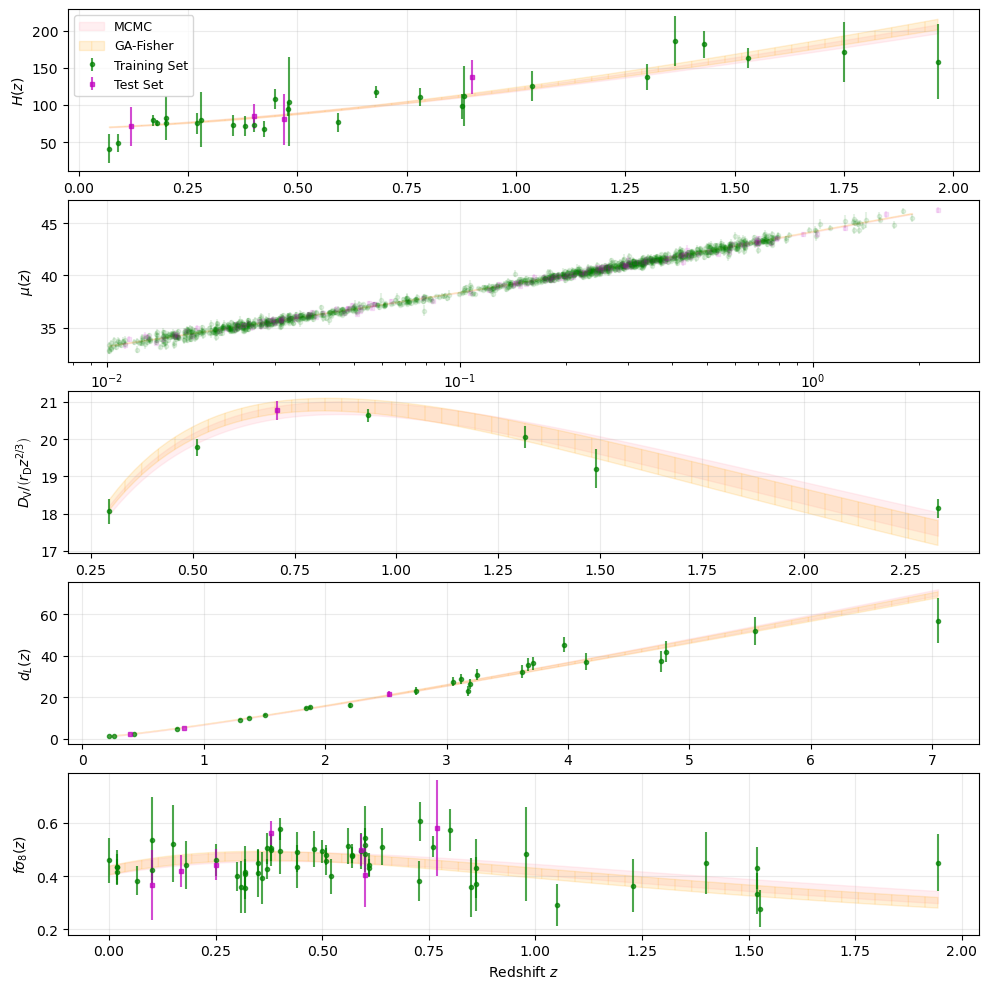

In [12]:
fig, ax=my_cosmo_learn.show_mocks(show_input=False)
my_cosmo_learn.show_bestfit_curve(ax=ax, method='MCMC', label='MCMC', color='pink')
my_cosmo_learn.show_bestfit_curve(ax=ax, method='GAFisher', color='orange', alpha=0.15, hatch='|', label='GA-Fisher')

[ax[i].grid(True, alpha=0.25) for i in range(len(my_cosmo_learn.mock_data.keys()))]
ax[0].legend(loc='upper left', prop={'size': 9})
fig.tight_layout(); fig.subplots_adjust(hspace=0.18)
plt.show()

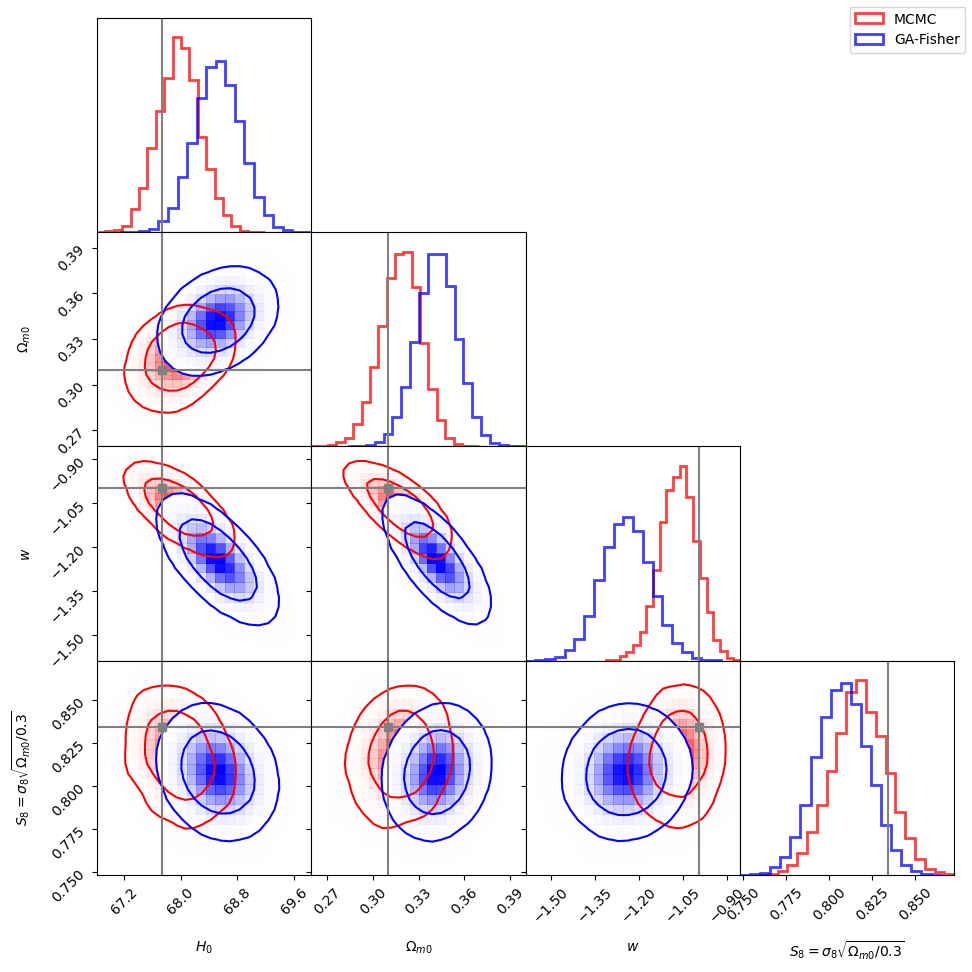

In [13]:
corner_plot = my_cosmo_learn.show_param_posterior(method='MCMC')
my_cosmo_learn.show_param_posterior(method='GAFisher', fig=corner_plot, color='blue', show_truth=True)

corner_plot.legend(['MCMC', 'GA-Fisher'], loc='upper right')
corner_plot.tight_layout(); corner_plot.subplots_adjust(hspace=0, wspace=0)
plt.show()